<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Linear Algebra <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 3 <br>
<font color=3C99D size=5>
Diagonalization, Eigenvectors and Decomposition <br>
<font color=696880 size=4>
<!-- <br> -->
Mahdi Alinejad - Mahan Bayhaghi

____


<h3 style='color: green;'>Purpose</h3>
In this notebook, we will explore eigenvalues and eigenvectors, and demonstrate diagonalization of a matrix. We will also compare the performance of computing matrix powers using regular methods versus diagonalization.

<h3 style='color: green;'>Student Information</h3>

In [18]:
student_number = '401105667'
first_name = 'Amirreza'
last_name = 'Inanloo'

<h3 style='color: green;'>Imports</h3>
import the necessary libraries.

In [14]:
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import timeit

<h3 style='color: green;'>Eigenvalues and Eigenvectors</h3>
Eigenvalues and eigenvectors are fundamental concepts in linear algebra. For a given square matrix A, if there is a non-zero vector v such that Av = λv, then λ is called the eigenvalue and v is the corresponding eigenvector.

<h3 style='color: green;'>Functions for Eigenvalues and Eigenvectors</h3>
We will define functions to compute eigenvalues and eigenvectors.

In [15]:
def compute_eigenvalues(A):
    """
    Computes and returns a list of eigenvalues of the input matrix A.

    Args:
    A (numpy.ndarray): The input matrix for which eigenvalues are computed.

    Returns:
    eigenvalues (list): A list containing the eigenvalues of matrix A.
    """
    # For a 2x2 matrix A, the characteristic polynomial is:
    # det(A - λI) = λ^2 - (tr(A))λ + det(A) = 0
    # where tr(A) is the trace of A and det(A) is the determinant of A
    trace = A[0, 0] + A[1, 1]
    determinant = A[0, 0] * A[1, 1] - A[0, 1] * A[1, 0]
    
    # Solving the quadratic equation λ^2 - (tr(A))λ + det(A) = 0
    eigenvalue1 = (trace + np.sqrt(trace**2 - 4 * determinant)) / 2
    eigenvalue2 = (trace - np.sqrt(trace**2 - 4 * determinant)) / 2
    
    return [eigenvalue1, eigenvalue2]

def compute_eigenvector(A, eigenvalue):
    """
    Computes the eigenvector corresponding to the given eigenvalue of matrix A.

    Args:
    - A (numpy.ndarray): The square matrix.
    - eigenvalue (float or complex): The eigenvalue for which the eigenvector is computed.

    Returns:
    - eigenvector (numpy.ndarray): The eigenvector corresponding to the input eigenvalue.
    """
    # For a 2x2 matrix A and an eigenvalue λ, we solve (A - λI)v = 0 for v
    I = np.eye(2)
    M = A - eigenvalue * I
    # We need to solve the system Mv = 0, which we can do by setting one component of v to 1
    # and solving for the other
    if M[0, 0] != 0:
        v = np.array([1, -M[0, 1] / M[0, 0]])
    else:
        v = np.array([-M[1, 1] / M[1, 0], 1])
    return v / np.linalg.norm(v)

def compute_eigenvectors(A):
    """
    Computes the eigenvectors of the matrix A.

    Args:
    - A (numpy.ndarray): The square matrix for which eigenvectors are computed.

    Returns:
    - eigenvectors (list of numpy.ndarray): A list containing the eigenvectors of matrix A.
    """
    eigenvalues = compute_eigenvalues(A)
    eigenvectors = np.array([compute_eigenvector(A, eigenvalue) for eigenvalue in eigenvalues])
    return eigenvectors

<h3 style='color: green;'>Visualization of Vectors</h3>
We will write a function to visualize vectors in 2D.

In [16]:
def plot_vectors(vectors, colors, labels, title):
    plt.figure()
    plt.axhline(0, color='gray', lw=0.5)
    plt.axvline(0, color='gray', lw=0.5)
    plt.grid()
    for vector, color, label in zip(vectors, colors, labels):
        plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color=color, label=label)
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.legend()
    plt.title(title)
    plt.show()


<h3 style='color: green;'>Example with a Random Matrix</h3>
We will generate a random 2D matrix with two independent eigenvectors and visualize them along with a random vector. Then we apply the transformation and plot them again.

### no need to change the below cells

In [17]:
def generate_valid_matrix():
    while True:
        A = np.random.rand(2, 2)
        eigenvalues = np.linalg.eigvals(A)
        if (np.all(np.isreal(eigenvalues)) and
            len(set(eigenvalues)) == 2 and
            np.all(np.abs(eigenvalues) > 0.33) and
            np.all(np.abs(eigenvalues) < 3)):
            return A

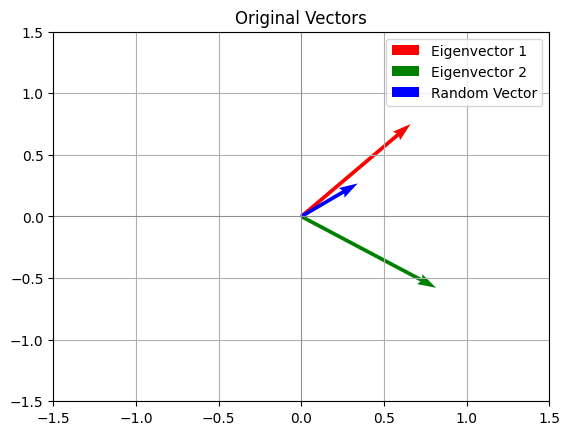

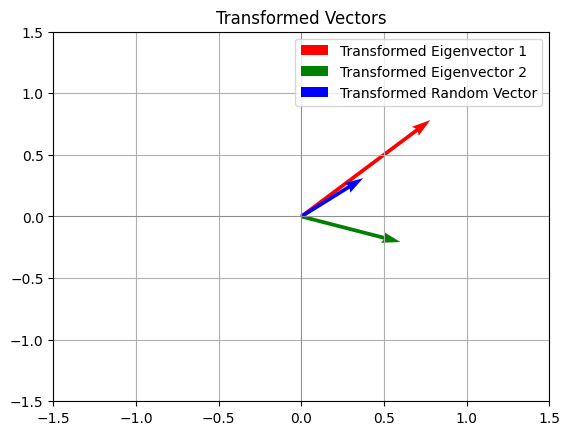

In [37]:
A = generate_valid_matrix()
eigenvectors = compute_eigenvectors(A)

random_vector = np.random.rand(2)

plot_vectors([eigenvectors[0], eigenvectors[1], random_vector],
             ['r', 'g', 'b'],
             ['Eigenvector 1', 'Eigenvector 2', 'Random Vector'],
             'Original Vectors')

transformed_vectors = [A @ eigenvectors[0], A @ eigenvectors[1], A @ random_vector]

plot_vectors(transformed_vectors,
             ['r', 'g', 'b'],
             ['Transformed Eigenvector 1', 'Transformed Eigenvector 2', 'Transformed Random Vector'],
             'Transformed Vectors')

<h3 style='color: red;'>Question</h3>
explain this behavior of these vectors in 2D plain

<h3 style='color: yellow;'>Your answer</h3>

The behavior of the vectors in the 2D plane, as demonstrated by the plots, can be explained through the properties of eigenvalues and eigenvectors in linear transformations. Let's break down the observed behavior:

### 1. Original Vectors:

- **Eigenvectors** : Eigenvectors are special vectors that, when a linear transformation (represented by matrix 𝐴) is applied to them, their direction does not change. They only get scaled by the corresponding eigenvalues.
- **Random Vector** : A randomly generated vector whose direction and magnitude are not special with respect to the transformation A.
### 2. Transformed Vectors:

- **Transformed Eigenvectors** : When the eigenvectors are transformed by A, they will only be scaled by their respective eigenvalues. This means that while their magnitude might change (they could be stretched or compressed), their direction remains unchanged. This is a key property of eigenvectors.
- **Transformed Random Vector** : When a random vector is transformed by A, its direction generally changes unless it happens to be aligned with one of the eigenvectors. The transformation matrix A applies a linear transformation that can involve both rotation and scaling.
## Observations and Explanation:
1. **Eigenvectors** :

- - In the original plot, the eigenvectors might have different lengths, but they are oriented in their specific directions.
- - In the transformed plot, the eigenvectors will still point in the same directions as in the original plot but will be scaled. If an eigenvector is scaled by a positive eigenvalue, it will stretch in the same direction. If the eigenvalue is negative, the eigenvector will flip direction but still be along the same line.
2. **Random Vector** :

- - The original random vector has an arbitrary direction and magnitude.
- - After transformation, the direction of the random vector will generally change because it is not an eigenvector. The transformation by A will rotate and scale it in a way that depends on the entries of A.
## Geometric Interpretation:
- **Linear Transformations**: Matrix A represents a linear transformation in the 2D plane. Eigenvectors represent invariant directions under this transformation, meaning that any vector along these directions is merely scaled by the transformation.
- **Scaling** : The eigenvalues represent how much the eigenvectors are scaled. For example, if an eigenvalue is 2, the corresponding eigenvector is stretched to twice its original length. If the eigenvalue is 0.5, the eigenvector is compressed to half its original length.
### Conclusion:
- Eigenvectors remain in their span: The key behavior observed is that eigenvectors remain along the same line after the transformation. This highlights their property of being invariant in direction under the transformation A.
- General vectors change direction: Any vector that is not an eigenvector will generally change its direction under the transformation, demonstrating the effect of the full linear transformation represented by A.

By observing the transformation behavior of these vectors, we gain insights into the structure of the matrix A and how it acts as a linear operator in the 2D plane.

<h3 style='color: green;'>Diagonalization</h3>
Diagonalization of a matrix involves finding a matrix P and a diagonal matrix D such that A = PDP^(-1). This is possible if A has n linearly independent eigenvectors.

In [38]:
def diagonalize(A):
    """
    Diagonalizes the square matrix A if possible using eigenvectors.

    Args:
    - A (numpy.ndarray): The square matrix to be diagonalized.

    Returns:
    - diagonal_matrix (numpy.ndarray): The diagonal matrix D such that A = PDP^-1,
      where D is diagonal and P is the matrix of eigenvectors.

    Attempts to diagonalize the input square matrix A using eigenvectors.
    Returns the diagonal matrix D. You are allowed to use numpy.linalg.inv(P) to compute P^-1,
    but not allowed to use numpy.linalg in other parts.
    """
    
    # Step 1: Compute the eigenvalues and eigenvectors of A
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    # Step 2: Form the matrix P from the eigenvectors
    P = eigenvectors
    
    # Step 3: Form the diagonal matrix D from the eigenvalues
    D = np.diag(eigenvalues)
    
    # Step 4: Verify if A can be diagonalized by checking if P is invertible
    try:
        P_inv = np.linalg.inv(P)
    except np.linalg.LinAlgError:
        print("Matrix A cannot be diagonalized because P is not invertible.")
        return None
    
    
    # Step 5: Return the diagonal matrix D
    return D

# Example usage:
A = np.array([[4, 1], [2, 3]])
diagonal_matrix = diagonalize(A)
print("Diagonal matrix D:\n", diagonal_matrix)


Diagonal matrix D:
 [[5. 0.]
 [0. 2.]]


to check your answer use the cells below

In [39]:
def check_diagonalization(D, A):
    is_diagonal = np.allclose(D, np.diag(np.diagonal(D)))
    eigenvalues_A = np.linalg.eigvals(A)
    diagonal_entries_D = np.diagonal(D)
    has_correct_diagonal = np.allclose(np.sort(eigenvalues_A), np.sort(diagonal_entries_D))
    has_all_eigenvalues = set(diagonal_entries_D) >= set(eigenvalues_A)

    if is_diagonal and has_correct_diagonal and has_all_eigenvalues:
        display(HTML('<font color="green">All conditions satisfied:</font> Matrix D properly diagonalizes matrix A.'))
    else:
        if not is_diagonal:
            display(HTML('<font color="red">Error:</font> Matrix D is not diagonal.'))
        if not has_correct_diagonal:
            display(HTML('<font color="red">Error:</font> Diagonal entries of D are not eigenvalues of A.'))
        if not has_all_eigenvalues:
            display(HTML('<font color="red">Error:</font> D does not include all eigenvalues of A.'))


In [53]:
A = generate_valid_matrix()

D = diagonalize(A) #TODO

if D is not None:
    check_diagonalization(D, A)
else:
    print("A hasn't a diagonal matrix")

#print(D)

<h3 style='color: green;'>Properties of Diagonalized Matrix</h3>
A diagonalized matrix has its eigenvalues on the diagonal. It is easier to compute powers of a diagonal matrix.

<h3 style='color: red;'>Question</h3>
How do you think we can speed up the process of calculating powers of a matrix by using diagonalization?

<h3 style='color: yellow;'>Your answer:</h3>

# here
Diagonalizing a matrix can significantly speed up the process of calculating powers of the matrix. The key idea is that for a diagonalizable matrix A, if 𝐴 = 𝑃𝐷𝑃^(−1) where D is a diagonal matrix, then: 𝐴^𝑘 = (𝑃𝐷𝑃^(−1)) ^ 𝑘 = 𝑃 𝐷^𝑘 𝑃^(−1)
 

Since 𝐷 is diagonal, raising it to a power is straightforward: simply raise each diagonal element to that power. This operation is much faster than performing repeated matrix multiplications.

Here's a step-by-step outline of the process:

- **Diagonalize the Matrix A**: Find matrices 𝑃 and D such that 𝐴 = 𝑃𝐷𝑃^(−1) .
- **Compute Powers of the Diagonal Matrix D**: Since D is diagonal, compute 𝐷^𝑘 by raising each diagonal element of 𝐷 to the power k.
- **Reconstruct the Matrix Power**: Use the relation 𝐴^𝑘 = 𝑃 𝐷^𝑘 𝑃^(−1) to get the power of the original matrix.

## Benefits:
- **Efficiency**: Computing 𝐷^𝑘 is efficient as it involves only scalar exponentiation.
- **Stability**: Numerical stability is often better preserved compared to repeated matrix multiplications.
Using diagonalization, the process of raising a matrix to a power becomes much more efficient, leveraging the simplicity of powering diagonal matrices.

<h3 style='color: green;'>Performance Comparison</h3>
We will compare the time taken to compute matrix powers using regular methods versus diagonalization.

First, we will compute the powers of a matrix using the regular method.

In [54]:
def compute_powers(A, n):
    result = A
    for _ in range(n-1):
        result = result @ A
    return result

In [55]:
n_values = range(1, 200)

In [56]:
regular_times = []

for n in n_values:
    timer = timeit.Timer(lambda: compute_powers(A, n))
    regular_times.append(timer.timeit(number=1))

Next, we will use your method for calculating power of a matrix.

In [58]:
def compute_powers_your_way(A, n):
    """
    Computes the power of a square matrix A to the nth degree using exponentiation by squaring.

    Args:
    - A (numpy.ndarray): The square matrix for which powers are computed.
    - n (int): The exponent to which A is raised.

    Returns:
    - result (numpy.ndarray): The matrix A raised to the power of n.
    """

    if not isinstance(A, np.ndarray) or A.ndim != 2 or A.shape[0] != A.shape[1]:
        raise ValueError("Input must be a square matrix (2D numpy array).")

    if not isinstance(n, int) or n < 0:
        raise ValueError("Exponent must be a non-negative integer.")

    # Base case for exponentiation
    if n == 0:
        return np.eye(A.shape[0], dtype=A.dtype)

    result = np.eye(A.shape[0], dtype=A.dtype)
    base = A.copy()

    while n > 0:
        if n % 2 == 1:
            result = np.dot(result, base)
        base = np.dot(base, base)
        n //= 2

    return result

# Example usage:
#A = np.array([[2, 0], [0, 2]])
#n = 3
#print(compute_powers_your_way(A, n))


In [59]:
diagonal_times = []

for n in n_values:
    timer = timeit.Timer(lambda: compute_powers_your_way(A, n))
    diagonal_times.append(timer.timeit(number=1))

Finally, we will plot the results to compare the performance of both methods.

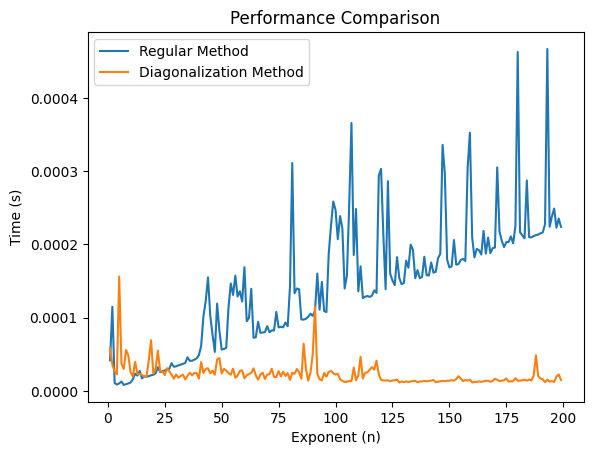

In [60]:
plt.plot(n_values, regular_times, label='Regular Method')
plt.plot(n_values, diagonal_times, label='Diagonalization Method')
plt.xlabel('Exponent (n)')
plt.ylabel('Time (s)')
plt.legend()
plt.title('Performance Comparison')
plt.show()

<h3 style='color: green;'>Background: </h3>

QR decomposition is a matrix factorization technique that decomposes a matrix
𝐴
into an orthogonal matrix
𝑄
and an upper triangular matrix
𝑅
R. The Gram-Schmidt process is a method for orthogonalizing a set of vectors in an inner product space, which forms the basis of this decomposition.

<h3 style='color: green;'>Gram-Schmidt Process: </h3>

A method to orthogonalize a set of vectors in an inner product space.

<h3 style='color: green;'>Theory: </h3>

Given a matrix
$ 𝐴 ∈ 𝑅^{𝑚 × 𝑛} $ , QR decomposition aims to find an orthogonal matrix
$ Q ∈ 𝑅^{𝑚 × 𝑛} $ and an upper triangular matrix  $ R ∈ 𝑅^{n × 𝑛} $ such that:
$ A = Q R $

**In the section below, implement QR decompostion step by step :**

In [75]:
def gram_schmidt(A):
    """
    Performs QR decomposition of matrix A using the Gram-Schmidt process.

    Args:
    - A (numpy.ndarray): The matrix to be decomposed, of shape (m, n).

    Returns:
    - Q (numpy.ndarray): The orthogonal matrix of shape (m, n).
    - R (numpy.ndarray): The upper triangular matrix of shape (n, n).
    """
    
    # Get the shape of A
    m, n = A.shape
    
    # Initialize Q and R matrices
    Q = np.zeros((m, n))
    R = np.zeros((n, n))
    
    # Perform the Gram-Schmidt process
    for i in range(n):
        # Start with the original vector from A
        v = A[:, i]
        
        # Subtract the projection of v onto each previously computed q vector
        for j in range(i):
            R[j, i] = np.dot(Q[:, j], A[:, i])
            v = v - R[j, i] * Q[:, j]
        
        # The i-th diagonal element of R is the norm of v
        R[i, i] = np.sqrt(np.dot(v, v))
        
        # Normalize v to get the i-th column of Q
        Q[:, i] = v / R[i, i]
    
    return Q, R

def multiply_QR(Q, R):
    """
    Multiplies matrices Q and R to verify the QR decomposition.

    Args:
    - Q (numpy.ndarray): The orthogonal matrix of shape (m, n).
    - R (numpy.ndarray): The upper triangular matrix of shape (n, n).

    Returns:
    - A_reconstructed (numpy.ndarray): The product of Q and R, which should be the original matrix A.
    """
    
    # Check dimensions
    m, n = Q.shape
    n_r, k = R.shape
    if n != n_r:
        raise ValueError("Matrix dimensions do not match for multiplication.")

    # Multiply Q and R
    A_reconstructed = np.dot(Q, R)
    
    return A_reconstructed

def print_matrix(matrix, name):
    """
    Prints a matrix with elements formatted to two decimal points.

    Args:
    - matrix (numpy.ndarray): The matrix to print.
    - name (str): The name of the matrix (for display purposes).
    """
    print(f"{name} matrix:")
    for row in matrix:
        print(" ".join(f"{elem:.2f}" for elem in row))
    print()

# Example usage:
A = np.array([[1, 2, 4], [3, 4, 7], [5, 6, 8]])
Q, R = gram_schmidt(A)
A_reconstructed = multiply_QR(Q, R)

# Print matrices with two decimal points
# following code is to check that QR is equal to A
# you can see that the first matrix(i mean original matrix) and Reconstructed matrix are equal
print_matrix(A, "Original")
print_matrix(Q, "Q")
print_matrix(R, "R")
print_matrix(A_reconstructed, "Reconstructed")

Original matrix:
1.00 2.00 4.00
3.00 4.00 7.00
5.00 6.00 8.00

Q matrix:
0.17 0.90 -0.41
0.51 0.28 0.82
0.85 -0.35 -0.41

R matrix:
5.92 7.44 10.99
0.00 0.83 2.76
0.00 0.00 0.82

Reconstructed matrix:
1.00 2.00 4.00
3.00 4.00 7.00
5.00 6.00 8.00



Now, let's check if the decompostion. No need to change the following cell.

In [88]:
def test_QR_decomposition():
    A = np.random.random((4, 4))
    Q, R = gram_schmidt(A)
    print("Matrix A:")
    print(A)
    print("\nOrthogonal matrix Q:")
    print(Q)
    print("\nUpper triangular matrix R:")
    print(R)
    print(f"\nCheck A = QR: {np.allclose(A, np.dot(Q, R))}")
    print(f"\nCheck Q^T Q = I: {np.allclose(np.dot(Q.T, Q), np.eye(Q.shape[1]))}")

test_QR_decomposition()

Matrix A:
[[0.56 0.08 0.5  0.91]
 [0.18 0.96 0.39 0.34]
 [0.12 0.31 0.65 0.49]
 [0.1  0.88 0.65 0.49]]

Orthogonal matrix Q:
[[ 0.92 -0.35 -0.06  0.14]
 [ 0.29  0.66 -0.5  -0.48]
 [ 0.19  0.16  0.82 -0.52]
 [ 0.16  0.65  0.27  0.69]]

Upper triangular matrix R:
[[0.6  0.55 0.8  1.11]
 [0.   1.22 0.6  0.3 ]
 [0.   0.   0.48 0.31]
 [0.   0.   0.   0.05]]

Check A = QR: True

Check Q^T Q = I: True


In this section, we will implement [Househodler reflection](https://en.wikipedia.org/wiki/Householder_transformation) method to compute QR decomposition.

<h3 style='color: green;'>Concept of Householder Reflections: </h3>

Householder reflections are used to zero out specific elements of a vector or matrix. A Householder reflection is defined by a vector
𝑣 and it generates a matrix  𝐻 such that:
$$ 𝐻 = 𝐼 − 2𝑣𝑣^𝑇 $$
where  𝑣 is a unit vector. This transformation is used to reflect a vector about a plane or hyperplane. When applied to a vector, it can zero out all elements below the first one, which is useful for transforming a matrix into an upper triangular form.

<h3 style='color: green;'>Using Householder Reflections for QR Decomposition: </h3>

The goal is to decompose a matrix
𝐴 into an orthogonal matrix 𝑄 and an upper triangular matrix 𝑅. Householder reflections are used to systematically zero out the sub-diagonal elements of
𝐴 transforming it into
𝑅. The orthogonal matrix
𝑄 is the product of all Householder matrices used in the process.

In [94]:
def householder_reflection(a):
    """
    Computes the Householder reflection matrix for a vector a.

    Args:
    - a (numpy.ndarray): The vector to reflect.

    Returns:
    - H (numpy.ndarray): The Householder reflection matrix.
    """
    # Ensure a is a column vector
    a = a.reshape(-1, 1)
    
    # Compute the norm of a manually
    norm_a = np.sqrt(np.sum(a ** 2))
    
    # Determine the sign to avoid numerical instability
    sign = 1 if a[0, 0] >= 0 else -1
    
    # Compute the vector v for Householder reflection
    v = a + sign * norm_a * np.eye(a.shape[0], 1)
    v = v / np.sqrt(np.sum(v ** 2))  # Normalize v manually
    
    # Compute the Householder reflection matrix H
    H = np.eye(a.shape[0]) - 2 * np.dot(v, v.T)
    
    return H

def qr_householder(A):
    """
    Computes the QR decomposition of a matrix A using Householder reflections.

    Args:
    - A (numpy.ndarray): The matrix to decompose, of shape (m, n).

    Returns:
    - Q (numpy.ndarray): The orthogonal matrix of shape (m, m).
    - R (numpy.ndarray): The upper triangular matrix of shape (m, n).
    """
    
    m, n = A.shape
    Q = np.eye(m)
    R = A.copy()
    
    for i in range(min(m, n)):
        # Extract the vector to reflect
        x = R[i:, i]
        
        # Compute the Householder reflection matrix for the vector x
        H_i = np.eye(m)
        H_i[i:, i:] = householder_reflection(x)
        
        # Apply the Householder transformation to R
        R = np.dot(H_i, R)
        
        # Accumulate the transformations in Q
        Q = np.dot(Q, H_i)
    
    return Q, R


# Example usage:
A = np.array([[1, 2, 4], [3, 4, 7], [5, 6, 8]])
Q, R = qr_householder(A)

# Print matrices with two decimal points
print_matrix(A, "Original")
print_matrix(Q, "Q")
print_matrix(R, "R")

print(f"\nCheck A = QR: {np.allclose(A, np.dot(Q, R))}")
print(f"\nCheck Q^T Q = I: {np.allclose(np.dot(Q.T, Q), np.eye(Q.shape[1]))}")

Original matrix:
1.00 2.00 4.00
3.00 4.00 7.00
5.00 6.00 8.00

Q matrix:
-0.17 0.90 -0.41
-0.51 0.28 0.82
-0.85 -0.35 -0.41

R matrix:
-5.92 -7.44 -10.99
0.00 0.83 2.76
-0.00 0.00 0.82


Check A = QR: True

Check Q^T Q = I: True


Now, let's check if the decompostion.


In [100]:
test_QR_decomposition()

Matrix A:
[[0.44 0.89 0.2  0.3 ]
 [0.35 0.96 0.36 0.83]
 [0.41 0.87 0.52 0.85]
 [0.39 0.14 0.31 0.7 ]]

Orthogonal matrix Q:
[[ 0.55  0.15 -0.76 -0.3 ]
 [ 0.44  0.49  0.12  0.74]
 [ 0.51  0.2   0.63 -0.55]
 [ 0.49 -0.83  0.09  0.25]]

Upper triangular matrix R:
[[0.79 1.43 0.68 1.31]
 [0.   0.67 0.06 0.05]
 [0.   0.   0.24 0.47]
 [0.   0.   0.   0.23]]

Check A = QR: True

Check Q^T Q = I: True


<h3 style='color: green;'> Calculating Eigenvalues Using QR Decomposition </h3>

Eigenvalues and eigenvectors are fundamental concepts in linear algebra, playing a crucial role in various mathematical and scientific applications. One efficient method to compute eigenvalues of a matrix is through QR decomposition. In this section, we will use QR decomposition to estimate eigenvalues and eigenvectors.

The QR algorithm utilizes QR decomposition iteratively to approximate eigenvalues of $ A $. Here’s a step-by-step outline of how this process works:

1. **Initial Setup:**
   - Start with a square matrix $ A $.

2. **QR Decomposition Iteration:**
   - Decompose $ A $ into $ Q $ and R such that:

     $$ A^{(0)} = Q^{(0)} R^{(0)} $$

   - Update $ A $ iteratively:

     $$ A^{(k)} = R^{(k-1)} Q^{(k-1)} $$
   - Convergence is typically checked by ensuring $ A^{(k)} $ becomes increasingly upper triangular or converges to a diagonal matrix.

3. **Extracting Eigenvalues:**
   - After convergence, the diagonal elements of the upper triangular matrix $ A^{(k)} $ are the eigenvalues of $ A $.

In [112]:
def qr_algorithm(A, num_iterations=1000, tol=1e-10):
    """
    Computes the eigenvalues of a matrix A using the QR algorithm.

    Args:
    - A (numpy.ndarray): The matrix to compute eigenvalues for.
    - num_iterations (int): The number of iterations for the QR algorithm.
    - tol (float): The tolerance for convergence.

    Returns:
    - eigenvalues (numpy.ndarray): The eigenvalues of the matrix A.
    - Q_total (numpy.ndarray): The accumulated orthogonal matrix Q.
    """
    A_k = A.copy()
    Q_total = np.eye(A.shape[0])
    for _ in range(num_iterations):
        Q, R = qr_householder(A_k)
        A_k = np.dot(R, Q)
        Q_total = np.dot(Q_total, Q)
        # Check for convergence
        off_diagonal_norm = np.sqrt(np.sum(np.tril(A_k, -1)**2))
        if off_diagonal_norm < tol:
            break
    eigenvalues = np.diag(A_k)
    return eigenvalues, Q_total

def compute_eigenvectors(A, eigenvalues):
    """
    Computes the eigenvectors of matrix A given its eigenvalues.

    Args:
    - A (numpy.ndarray): The matrix.
    - eigenvalues (numpy.ndarray): The eigenvalues of A.

    Returns:
    - eigenvectors (numpy.ndarray): The eigenvectors of A.
    """
    eigenvectors = []
    for eigenvalue in eigenvalues:
        I = np.eye(A.shape[0])
        A_shifted = A - eigenvalue * I
        _, _, Vt = np.linalg.svd(A_shifted)
        eigenvector = Vt[-1, :]
        eigenvectors.append(eigenvector)
    return np.array(eigenvectors).T


# Example usage:
A = np.array([[1, 2, 4], [3, 4, 7], [5, 6, 8]])
eigenvalues, Q_total = qr_algorithm(A)
eigenvectors = compute_eigenvectors(A, eigenvalues)

# Print results
print_matrix(A, "Original")
print_matrix(np.diag(eigenvalues), "Eigenvalues")
print_matrix(eigenvectors, "Eigenvectors")


Original matrix:
1.00 2.00 4.00
3.00 4.00 7.00
5.00 6.00 8.00

Eigenvalues matrix:
14.66 0.00 0.00
0.00 -1.47 0.00
0.00 0.00 -0.19

Eigenvectors matrix:
-0.31 -0.65 0.58
-0.58 -0.44 -0.78
-0.75 0.62 0.22



Let's verify our results. no need to change the following cell.

In [113]:
# fix the problem
def test_qr_algorithm():
    A = np.random.random((4,4))
    eigenvalues, Q_total = qr_algorithm(A)

    eigenvectors = compute_eigenvectors(A, eigenvalues)
    print("Matrix A:")
    print(A)
    print("\nEigenvalues (QR Algorithm):")
    print(eigenvalues)
    print("\nEigenvectors (QR Algorithm):")
    print(eigenvectors)

    # Verify the results
    print("\nVerification (A @ eigenvectors - eigenvectors @ np.diag(eigenvalues)):")
    print(np.allclose(A @ eigenvectors, eigenvectors @ np.diag(eigenvalues)))

    # Compare with NumPy's eig function
    np_eigenvalues, np_eigenvectors = np.linalg.eig(A)
    np_eigenvalues = np_eigenvalues.real

    print("\nEigenvalues (NumPy):")
    print(np_eigenvalues)

    print("\nEigenvectors (NumPy):")
    print(np_eigenvectors)

    print("\nVerification with NumPy (Eigenvalues):")
    print(np.allclose(np.sort(eigenvalues), np.sort(np_eigenvalues)))

test_qr_algorithm()

Matrix A:
[[0.89 0.71 0.88 0.88]
 [0.39 0.   0.41 0.18]
 [0.92 0.79 0.38 0.15]
 [0.82 0.45 0.53 0.65]]

Eigenvalues (QR Algorithm):
[ 2.37 -0.44 -0.25  0.24]

Eigenvectors (QR Algorithm):
[[ 0.69 -0.27  0.71  0.21]
 [ 0.23 -0.52 -0.65 -0.26]
 [ 0.45  0.81 -0.17 -0.64]
 [ 0.52  0.03 -0.22  0.69]]

Verification (A @ eigenvectors - eigenvectors @ np.diag(eigenvalues)):
True

Eigenvalues (NumPy):
[ 2.37  0.24 -0.25 -0.44]

Eigenvectors (NumPy):
[[-0.69 -0.21 -0.71 -0.27]
 [-0.23  0.26  0.65 -0.52]
 [-0.45  0.64  0.17  0.81]
 [-0.52 -0.69  0.22  0.03]]

Verification with NumPy (Eigenvalues):
True


<h3 style='color: green;'> Conclusion: </h3>


QR decomposition offers a powerful method for computing eigenvalues numerically. Its iterative nature makes it suitable for matrices of varying sizes and complexities, providing a robust approach to solving eigenvalue problems in practice.
